<a href="https://colab.research.google.com/github/frank-morales2020/Cloud_curious/blob/master/TOP10PYLIB_FOR_GAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Installation Cell - Run this first in Colab (and restart runtime if needed after install)
!pip install spacy transformers fastapi streamlit langchain langchain-openai llama-index llama-index-llms-openai llama-index-embeddings-huggingface sentence-transformers openai tensorflow torch uvicorn
!python -m spacy download en_core_web_sm

# Create sample data for LlamaIndex
!mkdir -p data
!echo "This is a sample document about generative AI. It covers topics like text generation and image creation." > data/sample.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 126.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



=== Demo 1: spaCy ===
Entities: [('Apple', 'ORG'), ('U.K.', 'GPE'), ('$1 billion', 'MONEY')]

=== Demo 2: Transformers (Hugging Face) ===


Device set to use cuda:0


Generated text: Generative AI is designed to be able to use the same data to build a highly intelligent AI. This could be done with the help of intelligent AI technology, but this is not what is being done at this time.

The big question is how to make artificial

=== Demo 3: FastAPI (Code Snippet) ===

from fastapi import FastAPI
from transformers import pipeline, set_seed
set_seed(42)
app = FastAPI()
generator = pipeline('text-generation', model='gpt2')

@app.get("/generate/{prompt}")
def generate_text(prompt: str):
    result = generator(prompt, max_new_tokens=50, truncation=True, do_sample=True, temperature=0.7, pad_token_id=50256)
    return {"text": result[0]['generated_text']}

# Save as main.py and run: !uvicorn main:app --reload --host 0.0.0.0 --port 8000
# Then visit: http://localhost:8000/generate/Hello


=== Demo 4: Streamlit (Code Snippet) ===

import streamlit as st
from transformers import pipeline, set_seed
set_seed(42)
st.title("Generative AI Demo")
prompt = st.text_in

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated: demo_image.png


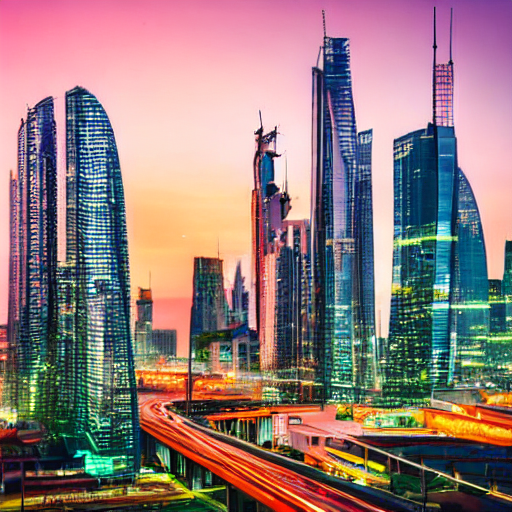


=== Demo 9: TensorFlow / Keras ===
Trained model prediction for 4.0: [[7.980849]]

=== Demo 10: PyTorch ===
Trained model prediction for 4.0: tensor([[8.]])

Demo complete! Check console for outputs and files.


In [3]:

# Top 10 Python Libraries for Generative AI Demo - Colab Edition
# This script demonstrates basic usage of each library in Google Colab.
# Note:
# - Run the installation cell above first and restart runtime if LlamaIndex fails.
# - Set your OPENAI_API_KEY in Colab's secrets (under the key icon in the left sidebar)
# - FastAPI and Streamlit demos are code snippets that need to be run separately (e.g., uvicorn for FastAPI, streamlit run for Streamlit)
# - This script runs non-server demos sequentially.

import os
import warnings
warnings.filterwarnings("ignore")

# Colab-specific import for userdata
from google.colab import userdata

# Retrieve API keys
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

# 1. spaCy: NLP preprocessing, entity recognition
def demo_spacy():
    print("\n=== Demo 1: spaCy ===")
    try:
        import spacy
        nlp = spacy.load("en_core_web_sm")
        doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
        print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])
    except ImportError:
        print("spaCy not installed.")

# 2. Transformers (Hugging Face): Text generation
def demo_transformers():
    print("\n=== Demo 2: Transformers (Hugging Face) ===")
    try:
        from transformers import pipeline, set_seed
        set_seed(42)  # For reproducibility
        generator = pipeline('text-generation', model='gpt2')
        result = generator("Generative AI is", max_new_tokens=50, num_return_sequences=1, truncation=True, do_sample=True, temperature=0.7, pad_token_id=50256)
        print("Generated text:", result[0]['generated_text'])
    except ImportError:
        print("Transformers not installed.")

# 3. FastAPI: Deploying models as APIs (snippet - run separately)
def demo_fastapi():
    print("\n=== Demo 3: FastAPI (Code Snippet) ===")
    print("""
from fastapi import FastAPI
from transformers import pipeline, set_seed
set_seed(42)
app = FastAPI()
generator = pipeline('text-generation', model='gpt2')

@app.get("/generate/{prompt}")
def generate_text(prompt: str):
    result = generator(prompt, max_new_tokens=50, truncation=True, do_sample=True, temperature=0.7, pad_token_id=50256)
    return {"text": result[0]['generated_text']}

# Save as main.py and run: !uvicorn main:app --reload --host 0.0.0.0 --port 8000
# Then visit: http://localhost:8000/generate/Hello
""")

# 4. Streamlit: Building web apps (snippet - run separately)
def demo_streamlit():
    print("\n=== Demo 4: Streamlit (Code Snippet) ===")
    print("""
import streamlit as st
from transformers import pipeline, set_seed
set_seed(42)
st.title("Generative AI Demo")
prompt = st.text_input("Enter prompt:")
if st.button("Generate"):
    generator = pipeline('text-generation', model='gpt2')
    result = generator(prompt, max_new_tokens=50, truncation=True, do_sample=True, temperature=0.7, pad_token_id=50256)
    st.write(result[0]['generated_text'])

# Save as app.py and run: !streamlit run app.py --server.port 8501
# Use ngrok or Colab tunneling for external access
""")

# 5. LangChain: Building LLM chains
def demo_langchain():
    print("\n=== Demo 5: LangChain ===")
    try:
        from langchain_openai import ChatOpenAI
        from langchain_core.prompts import PromptTemplate
        from langchain_core.output_parsers import StrOutputParser
        llm = ChatOpenAI(model="gpt-3.5-turbo")
        prompt = PromptTemplate.from_template("Tell me a joke about {topic}")
        chain = prompt | llm | StrOutputParser()
        result = chain.invoke({"topic": "AI"})
        print("Joke:", result)
    except ImportError:
        print("LangChain not installed.")
    except Exception as e:
        print("Error (check API key):", e)

# 6. LlamaIndex: Connecting LLMs to data
def demo_llamaindex():
    print("\n=== Demo 6: LlamaIndex ===")
    try:
        from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
        from llama_index.llms.openai import OpenAI
        from llama_index.embeddings.huggingface import HuggingFaceEmbedding
        Settings.embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")
        llm = OpenAI(model="gpt-3.5-turbo")
        Settings.llm = llm
        documents = SimpleDirectoryReader("data").load_data()
        index = VectorStoreIndex.from_documents(documents)
        query_engine = index.as_query_engine()
        response = query_engine.query("What is this document about?")
        print("Response:", str(response))
    except ImportError:
        print("LlamaIndex not installed.")
    except Exception as e:
        print("Error (check data dir and API key):", e)

# 7. OpenAI API: Integrating GPT models
def demo_openai():
    print("\n=== Demo 7: OpenAI API ===")
    try:
        from openai import OpenAI
        client = OpenAI(api_key=OPENAI_API_KEY)
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": "Greet me in a fun, witty way as if you are Generative AI."}]
        )
        print("Response:", response.choices[0].message.content)
    except ImportError:
        print("OpenAI not installed.")
    except Exception as e:
        print("Error (check API key):", e)

# 8. Stability SDK: Stable Diffusion for images (using Hugging Face Diffusers as alternative)
def demo_stability():
    print("\n=== Demo 8: Stability SDK (using Diffusers) ===")
    try:
        from diffusers import StableDiffusionPipeline
        import torch
        from IPython.display import Image
        pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
        pipe = pipe.to("cuda")
        image = pipe("A futuristic cityscape at sunset").images[0]
        image.save("demo_image.png")
        print("Image generated: demo_image.png")
        display(Image("demo_image.png"))
    except ImportError:
        print("Diffusers not installed.")
    except Exception as e:
        print("Error (may require GPU):", e)

# 9. TensorFlow / Keras: Large-scale training
def demo_tensorflow_keras():
    print("\n=== Demo 9: TensorFlow / Keras ===")
    try:
        import tensorflow as tf
        from tensorflow import keras
        model = keras.Sequential([keras.layers.Dense(1, input_shape=(1,))])
        model.compile(optimizer='sgd', loss='mse')
        x = tf.constant([[1.0], [2.0], [3.0]])
        y = tf.constant([[2.0], [4.0], [6.0]])
        model.fit(x, y, epochs=1000, verbose=0)
        print("Trained model prediction for 4.0:", model.predict(tf.constant([[4.0]]), verbose=0))
    except ImportError:
        print("TensorFlow/Keras not installed.")

# 10. Torch (PyTorch): Deep learning backbone
def demo_pytorch():
    print("\n=== Demo 10: PyTorch ===")
    try:
        import torch
        import torch.nn as nn
        import torch.optim as optim
        # Simple linear model
        model = nn.Linear(1, 1)
        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.1)
        x = torch.tensor([[1.0], [2.0], [3.0]], requires_grad=True)
        y = torch.tensor([[2.0], [4.0], [6.0]])
        for epoch in range(1000):
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            pred = model(torch.tensor([[4.0]]))
            print("Trained model prediction for 4.0:", pred)
    except ImportError:
        print("PyTorch not installed.")

if __name__ == "__main__":
    demo_spacy()
    demo_transformers()
    demo_fastapi()
    demo_streamlit()
    demo_langchain()
    demo_llamaindex()
    demo_openai()
    demo_stability()
    demo_tensorflow_keras()
    demo_pytorch()
    print("\nDemo complete! Check console for outputs and files.")